In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from module import MultinomialNBClassifier, RandomizedSearchCV, CrossValidation

In [2]:
data_frame = pd.read_csv('tweets-data/sorted_labelled_cleaneddata_JogjaCuaca - Sheet2.csv')

In [3]:
def ubah(x):
    if x == 'hujan':
        return 1
    if x == 'terang':
        return 0
    if x == 'netral':
        return 2

In [4]:
# Extract texts and labels
texts = data_frame['full_text']
labels = data_frame['label']

In [5]:
# Step 2: Convert text to numerical features
countvector = CountVectorizer()
X = countvector.fit_transform(texts)
X = X.toarray() if hasattr(X, "toarray") else X
y = labels.apply(ubah)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [6]:
X_train.shape, y_train.shape

((161, 1255), (161,))

In [7]:
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

# Model and Training Model

In [8]:
alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
iter = 7

In [9]:
k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

In [10]:
best_score, best_param = RandomizedSearchCV(X_train_np, y_train_np, iter, k_folds, alpha_values)

Alpha: 0.1, Average CV Accuracy: 0.46571969696969695
Alpha: 0.5, Average CV Accuracy: 0.521969696969697
Alpha: 1.0, Average CV Accuracy: 0.5840909090909091
Alpha: 1.5, Average CV Accuracy: 0.6087121212121211
Alpha: 2.0, Average CV Accuracy: 0.6089015151515151
Alpha: 2.5, Average CV Accuracy: 0.5901515151515151
Alpha: 3.0, Average CV Accuracy: 0.5651515151515152


In [11]:
classifier = MultinomialNBClassifier(alpha=best_param['alpha'])
classifier.fit(X_train, y_train)
classifier.show_process(X_test)


Instance 1:
Features: [0 0 0 ... 0 0 0]
  Class 'hujan': Score = -81.5277597712026
  Class 'netral': Score = -80.25027012203294
  Class 'terang': Score = -81.8652566650773
Predicted class: netral

Instance 2:
Features: [0 0 0 ... 0 0 0]
  Class 'hujan': Score = -52.30410610822801
  Class 'netral': Score = -49.16675095243079
  Class 'terang': Score = -51.33058367002303
Predicted class: netral

Instance 3:
Features: [0 0 0 ... 0 0 0]
  Class 'hujan': Score = -111.16943022559934
  Class 'netral': Score = -110.8424147435447
  Class 'terang': Score = -113.56413298250379
Predicted class: netral

Instance 4:
Features: [0 0 0 ... 0 0 0]
  Class 'hujan': Score = -78.36468513716113
  Class 'netral': Score = -82.04077418127088
  Class 'terang': Score = -78.3931931675465
Predicted class: hujan

Instance 5:
Features: [0 0 0 ... 0 0 0]
  Class 'hujan': Score = -129.31086688509166
  Class 'netral': Score = -128.1775895120682
  Class 'terang': Score = -128.83422291148887
Predicted class: netral

Inst

In [12]:
print('Best Score: ', best_score)
print('Best Alpha: ', best_param['alpha'])

Best Score:  0.6089015151515151
Best Alpha:  2.0


In [13]:
classifier.info()

class priors: {'hujan': 0.2360248447204969, 'netral': 0.5279503105590062, 'terang': 0.2360248447204969}
feature probabilities: {'hujan': array([0.00063412, 0.00063412, 0.00380469, ..., 0.00063412, 0.00063412,
       0.00063412]), 'netral': array([0.00105652, 0.00105652, 0.0042261 , ..., 0.00052826, 0.00079239,
       0.00052826]), 'terang': array([0.00062383, 0.00062383, 0.00436681, ..., 0.00093575, 0.00062383,
       0.00093575])}


# Testing and Overview

In [14]:
# Step 5: Make predictions and evaluate the model
y_pred = classifier.predict(X_test)
y_pred.shape

(41,)

In [15]:
y_test = y_test.to_numpy().reshape((41,))

In [16]:
y_test.shape, y_pred.shape

((41,), (41,))

In [17]:
result_table = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
result_table

,y_pred,y_test
0,netral,hujan
1,netral,hujan
2,netral,netral
3,hujan,hujan
4,netral,netral
5,netral,netral
6,netral,netral
7,netral,hujan
8,hujan,hujan
9,netral,netral


In [18]:
report = classification_report(y_pred, y_test)

In [19]:
print(report)

              precision    recall  f1-score   support

       hujan       0.42      0.62      0.50         8
      netral       0.88      0.66      0.75        32
      terang       0.00      0.00      0.00         1

    accuracy                           0.63        41
   macro avg       0.43      0.43      0.42        41
weighted avg       0.76      0.63      0.68        41



In [20]:
import joblib

# Path untuk menyimpan model dan CountVectorizer
model_path = 'multinomial_nb_model.joblib'
vectorizer_path = 'countvectorizer_model.joblib'

# Simpan model yang telah dilatih
joblib.dump(classifier, model_path)

# Simpan CountVectorizer
joblib.dump(countvector, vectorizer_path)

print(f"Model dan CountVectorizer berhasil disimpan ke {model_path} dan {vectorizer_path}.")


Model dan CountVectorizer berhasil disimpan ke multinomial_nb_model.joblib dan countvectorizer_model.joblib.


In [ ]:
import joblib

# Save the trained model using joblib
model_filename = 'multinomial_nb_model.joblib'
CountVectorizer_filename = 'countvectorizer_model.joblib'
joblib.dump(classifier, model_filename)
joblib.dump(countvector, CountVectorizer_filename)
print(f'Model saved to {model_filename}')
print(f'Model saved to {CountVectorizer_filename}')

In [74]:
# Function to load the model and make predictions
def load_model_and_predict(model_path, text):
    # Load the model from the specified path
    loaded_model = joblib.load(model_path)
    
    # Convert input text to numerical features using the same CountVectorizer instance used for training
    text_vectorized = countvector.transform([text]).toarray()
    
    # Make prediction using the loaded model
    prediction = loaded_model.predict(text_vectorized)
    
    return prediction

In [87]:
# Example usage of the function:
example_text = "hujannya deres bet"
predicted_label = load_model_and_predict(model_filename, example_text)
print(f'Predicted label for "{example_text}": {predicted_label}')

Predicted label for "hujannya deres bet": ['hujan']


Terang: 62.50%
Hujan: 37.50%


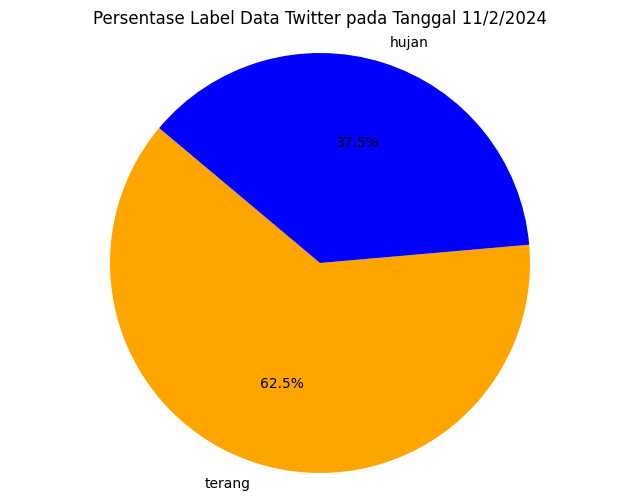

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = 'tweets-data/sorted_labelled_cleaneddata_JogjaCuaca - Sheet2.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 2: Filter data for the specific date
specific_date = '11/2/2024'
filtered_data = data[data['created_at'] == specific_date]

# Step 3: Filter for labels 'terang' and 'hujan'
filtered_labels = filtered_data[filtered_data['label'].isin(['terang', 'hujan'])]

# Step 4: Calculate percentages of each label
label_counts = filtered_labels['label'].value_counts()
total_count = label_counts.sum()
percentages = (label_counts / total_count) * 100

# Print out the percentages for each label
for label, percent in percentages.items():
    print(f"{label.capitalize()}: {percent:.2f}%")

# Step 5: Create a pie chart with specified colors
colors = ['orange', 'blue']  # Warna untuk label 'terang' dan 'hujan'
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f'Persentase Label Data Twitter pada Tanggal {specific_date}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()